In [29]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [30]:
Hamiltonian = [[(0, 'I'), (1, 'I'), (2, 'I'), (3, 'I')],
 [(0, 'Z'), (1, 'I'), (2, 'I'), (3, 'I')],
 [(0, 'I'), (1, 'Z'), (2, 'I'), (3, 'I')],
 [(0, 'I'), (1, 'I'), (2, 'Z'), (3, 'I')],
 [(0, 'I'), (1, 'I'), (2, 'I'), (3, 'Z')],
 [(0, 'Z'), (1, 'Z'), (2, 'I'), (3, 'I')],
 [(0, 'Y'), (1, 'X'), (2, 'X'), (3, 'Y')],
 [(0, 'Y'), (1, 'Y'), (2, 'X'), (3, 'X')],
 [(0, 'X'), (1, 'X'), (2, 'Y'), (3, 'Y')],
 [(0, 'X'), (1, 'Y'), (2, 'Y'), (3, 'X')],
 [(0, 'Z'), (1, 'I'), (2, 'Z'), (3, 'I')],
 [(0, 'Z'), (1, 'I'), (2, 'I'), (3, 'Z')],
 [(0, 'I'), (1, 'Z'), (2, 'Z'), (3, 'I')],
 [(0, 'I'), (1, 'Z'), (2, 'I'), (3, 'Z')],
 [(0, 'I'), (1, 'I'), (2, 'Z'), (3, 'Z')]]

In [32]:
data = [(0, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]),
 (1, [0, 2, 3, 4, 5, 10, 11, 12, 13, 14]),
 (2, [0, 1, 3, 4, 5, 10, 11, 12, 13, 14]),
 (3, [0, 1, 2, 4, 5, 10, 11, 12, 13, 14]),
 (4, [0, 1, 2, 3, 5, 10, 11, 12, 13, 14]),
 (5, [0, 1, 2, 3, 4, 10, 11, 12, 13, 14]),
 (6, [0]),
 (7, [0]),
 (8, [0]),
 (9, [0]),
 (10, [0, 1, 2, 3, 4, 5, 11, 12, 13, 14]),
 (11, [0, 1, 2, 3, 4, 5, 10, 12, 13, 14]),
 (12, [0, 1, 2, 3, 4, 5, 10, 11, 13, 14]),
 (13, [0, 1, 2, 3, 4, 5, 10, 11, 12, 14]),
 (14, [0, 1, 2, 3, 4, 5, 10, 11, 12, 13])]

In [33]:
constants = [(-0.09706626861762624+0j),
 (0.17141282639402405+0j),
 (0.171412826394024+0j),
 (-0.2234315367466397+0j),
 (-0.2234315367466397+0j),
 (0.1686889816869329+0j),
 (0.04530261550868928+0j),
 (-0.04530261550868928+0j),
 (-0.04530261550868928+0j),
 (0.04530261550868928+0j),
 (0.12062523481381837+0j),
 (0.16592785032250768+0j),
 (0.16592785032250768+0j),
 (0.12062523481381837+0j),
 (0.174412876106516+0j)]

In [34]:
G = nx.Graph() # undirected graph

In [35]:
node_Hamiltonian_cofactors={}

index_set=[]
for index, commuting_indices in data:
    PauliWord = Hamiltonian[index]
    PauliStrings = ['{}{}'.format(qubitOp, qubitNo) for qubitNo, qubitOp in PauliWord]
    
    seperator = ' '
    index_set.append(seperator.join(PauliStrings))
    
    node_Hamiltonian_cofactors.update({seperator.join(PauliStrings): constants[index]}) # so as to set node attributes!
    
print(index_set)
# print(node_Hamiltonian_cofactors)
node_Hamiltonian_cofactors
    

['I0 I1 I2 I3', 'Z0 I1 I2 I3', 'I0 Z1 I2 I3', 'I0 I1 Z2 I3', 'I0 I1 I2 Z3', 'Z0 Z1 I2 I3', 'Y0 X1 X2 Y3', 'Y0 Y1 X2 X3', 'X0 X1 Y2 Y3', 'X0 Y1 Y2 X3', 'Z0 I1 Z2 I3', 'Z0 I1 I2 Z3', 'I0 Z1 Z2 I3', 'I0 Z1 I2 Z3', 'I0 I1 Z2 Z3']


{'I0 I1 I2 I3': (-0.09706626861762624+0j),
 'Z0 I1 I2 I3': (0.17141282639402405+0j),
 'I0 Z1 I2 I3': (0.171412826394024+0j),
 'I0 I1 Z2 I3': (-0.2234315367466397+0j),
 'I0 I1 I2 Z3': (-0.2234315367466397+0j),
 'Z0 Z1 I2 I3': (0.1686889816869329+0j),
 'Y0 X1 X2 Y3': (0.04530261550868928+0j),
 'Y0 Y1 X2 X3': (-0.04530261550868928+0j),
 'X0 X1 Y2 Y3': (-0.04530261550868928+0j),
 'X0 Y1 Y2 X3': (0.04530261550868928+0j),
 'Z0 I1 Z2 I3': (0.12062523481381837+0j),
 'Z0 I1 I2 Z3': (0.16592785032250768+0j),
 'I0 Z1 Z2 I3': (0.16592785032250768+0j),
 'I0 Z1 I2 Z3': (0.12062523481381837+0j),
 'I0 I1 Z2 Z3': (0.174412876106516+0j)}

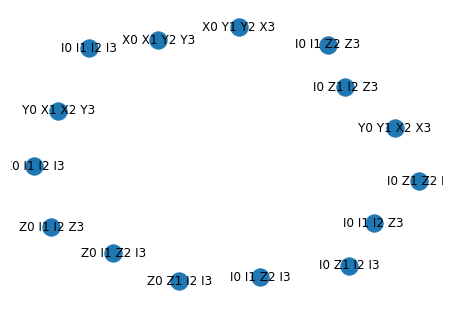

In [36]:
for index in index_set:
    G.add_node(index)
    
nx.draw(G, with_labels =1)
nx.set_node_attributes(G, node_Hamiltonian_cofactors, 'Cofactor')
plt.show()

In [37]:
list(G.nodes())

['I0 I1 I2 I3',
 'Z0 I1 I2 I3',
 'I0 Z1 I2 I3',
 'I0 I1 Z2 I3',
 'I0 I1 I2 Z3',
 'Z0 Z1 I2 I3',
 'Y0 X1 X2 Y3',
 'Y0 Y1 X2 X3',
 'X0 X1 Y2 Y3',
 'X0 Y1 Y2 X3',
 'Z0 I1 Z2 I3',
 'Z0 I1 I2 Z3',
 'I0 Z1 Z2 I3',
 'I0 Z1 I2 Z3',
 'I0 I1 Z2 Z3']

# Next add edges to graph

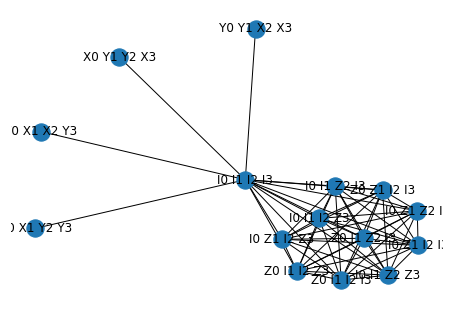

In [38]:
nodes_list = list(G.nodes())
for index, commuting_indices in data:
    
    for commuting_index in commuting_indices:
        G.add_edge(nodes_list[index], nodes_list[commuting_index])
            #print(Hamiltonian[index], Hamiltonian[commuting_index])
            
nx.draw(G, with_labels=1)
plt.show()

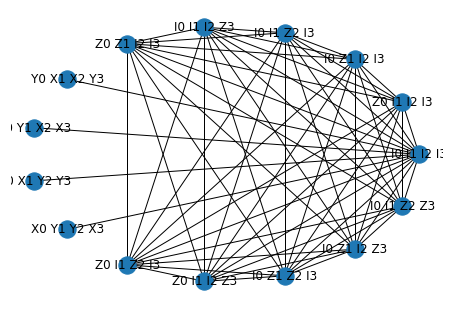

In [39]:
#%matplotlib qt
pos=nx.circular_layout(G)
nx.draw(G,pos,with_labels=1)
plt.show()

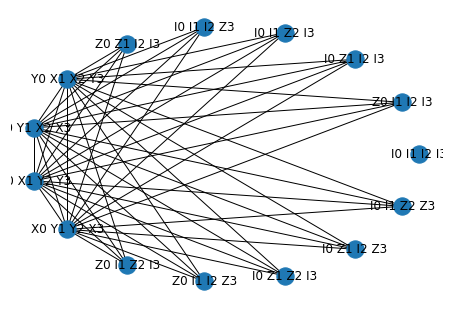

In [11]:
# complementary Graph

G_comp = nx.complement(G)
pos=nx.circular_layout(G_comp)
nx.draw(G_comp,pos,with_labels=1)
plt.show()

In [12]:
greedy = nx.greedy_color(G_comp, strategy='largest_first', interchange=False)
print(greedy)

{'Y0 X1 X2 Y3': 0, 'Y0 Y1 X2 X3': 1, 'X0 X1 Y2 Y3': 2, 'X0 Y1 Y2 X3': 3, 'Z0 I1 I2 I3': 4, 'I0 Z1 I2 I3': 4, 'I0 I1 Z2 I3': 4, 'I0 I1 I2 Z3': 4, 'Z0 Z1 I2 I3': 4, 'Z0 I1 Z2 I3': 4, 'Z0 I1 I2 Z3': 4, 'I0 Z1 Z2 I3': 4, 'I0 Z1 I2 Z3': 4, 'I0 I1 Z2 Z3': 4, 'I0 I1 I2 I3': 0}


In [13]:
# store the names (the keys of the new dict) as a set (keeps elements unique)
unique_colours = set(greedy.values())

# use a list comprehension, iterating through keys and checking the values match each n
colour_key_for_nodes = {}
for colour in unique_colours:
    colour_key_for_nodes[colour] = [k for k in greedy.keys() if greedy[k] == colour]
print(colour_key_for_nodes)

{0: ['Y0 X1 X2 Y3', 'I0 I1 I2 I3'], 1: ['Y0 Y1 X2 X3'], 2: ['X0 X1 Y2 Y3'], 3: ['X0 Y1 Y2 X3'], 4: ['Z0 I1 I2 I3', 'I0 Z1 I2 I3', 'I0 I1 Z2 I3', 'I0 I1 I2 Z3', 'Z0 Z1 I2 I3', 'Z0 I1 Z2 I3', 'Z0 I1 I2 Z3', 'I0 Z1 Z2 I3', 'I0 Z1 I2 Z3', 'I0 I1 Z2 Z3']}


[]

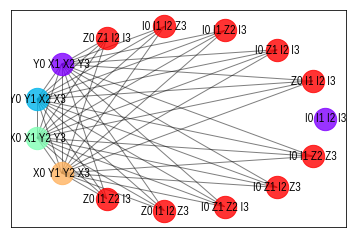

In [21]:
# %matplotlib qt

import matplotlib.cm as cm
import numpy as np
import matplotlib.font_manager as font_manager



colour_list = cm.rainbow(np.linspace(0, 1, len(colour_key_for_nodes)))

for colour in colour_key_for_nodes:
    nx.draw_networkx_nodes(G_comp,pos,
                       nodelist=colour_key_for_nodes[colour],
                       node_color=colour_list[colour],
                       node_size=500,
                       alpha=0.8)
    
nx.draw_networkx_edges(G_comp,pos,width=1.0,alpha=0.5)

# available fonts!
# import matplotlib
# avail_font_names = [f.name for f in matplotlib.font_manager.fontManager.ttflist]
nx.draw_networkx_labels(G_comp, pos, font_family='Liberation Sans Narrow', font_size=12)
plt.plot()


In [22]:
# import matplotlib
# avail_font_names = [f.name for f in matplotlib.font_manager.fontManager.ttflist]
# avail_font_names

In [15]:
font_size (int) – Font size for text labels (default=12)
font_color (string) – Font color string (default=’k’ black)
font_family (string) – Font family (default=’sans-serif’)


SyntaxError: invalid character in identifier (<ipython-input-15-8d47163590e6>, line 1)

In [16]:
import matplotlib.cm as cm
import numpy as np

ys = [1,2,3,4,5,6,7,8]

colors = cm.rainbow(np.linspace(0, 1, len(ys)))
print(colors)

[[5.00000000e-01 0.00000000e+00 1.00000000e+00 1.00000000e+00]
 [2.17647059e-01 4.29120609e-01 9.75511968e-01 1.00000000e+00]
 [7.25490196e-02 7.82927610e-01 9.00586702e-01 1.00000000e+00]
 [3.54901961e-01 9.74138602e-01 7.82927610e-01 1.00000000e+00]
 [6.45098039e-01 9.74138602e-01 6.22112817e-01 1.00000000e+00]
 [9.27450980e-01 7.82927610e-01 4.34676422e-01 1.00000000e+00]
 [1.00000000e+00 4.29120609e-01 2.19946358e-01 1.00000000e+00]
 [1.00000000e+00 1.22464680e-16 6.12323400e-17 1.00000000e+00]]
